# 1- Dataset overview & general preprocessing

First step is reading the dataset to get an intial look at its composition


In [62]:
import pandas as pd
import json

data_file_name = "concertation_logement_etudiants_en_metropole.json"

# Load the JSON file
with open(data_file_name, "r", encoding="utf-8") as file:
    data = json.load(file)

# Flatten nested JSON into a DataFrame
df = pd.json_normalize(data)

df.head()

,numberMatched,numberReturned,records,links
0,280,280,"[{'@id': '1', '1_niveau_d_etude': 'Master', '2...",[{'href': 'https://data.lillemetropole.fr/data...


The dataset is composed of 4 columns the columns "numberMatched", "numberReturned" and "Links" contains meta-data about the dataset while the column "records" contains the actual data that we will analyse

In [63]:
#extract the data from the records entry of the json file

with open(data_file_name, "r", encoding="utf-8") as file:
    data = json.load(file)

records = data["records"]
df = pd.DataFrame(records)
df.head()

,@id,1_niveau_d_etude,2_tu_etudies,3_es_tu_un_etudiant_etranger,4_travailles_tu_si_oui_est_ce,5_ton_logement_est_un,6_ton_logement_est,7_avec_qui_vis_tu,8_selon_toi_ton_logement_est_il,9_parmi_ces_propositions_quelles_sont_les_priorites_pour_un_log,10_ton_logement_repond_il_aux_priorites_que_tu_as_citees_preced,11_tu_souhaites_preciser,12_comment_as_tu_trouve_ton_logement_actuel_tu_as_rencontre_des,13_penses_tu_changer_de_logement_etudiant_et_si_oui_quelles_en_,14_quelles_sont_tes_envies_et_attentes_concernant_le_quartier_d,15_quel_est_ton_loyer_mensuel,16_une_fois_ton_loyer_paye_estimes_tu_qu_il_te_reste_assez_d_ar,17_connais_tu_ces_autres_types_de_logement,18_en_connais_tu_d_autres,19_aimerais_tu_vivre_dans_ce_type_de_logement
0,1,Master,Au sein d'une école,Non,En dehors de tes études (job étudiant),T1,Logement privé,En couple,Loin de ton lieu d'étude,"Un logement spacieux, Un loyer peu élévé (char...",Non,None,J'ai emménagé chez ma partenaire,"Oui, pour avoir un logement plus spacieux, mie...","sécurité, activité, commerces, bonne ambiance.",Plus de 450 €,Non,La cohabitation intergénérationnelle (contribu...,None,J'aurais aimé le faire pendant mes premières a...
1,2,Master,Au sein d'une université,Non,None,Studio,Logement privé,Seul,Loin de ton lieu d'étude,"Un loyer peu élévé (charges comprises), Vivre ...",Oui,"J'aurais voulu aussi citer ""Un logement spacie...","Sur Leboncoin. \r\nEtant originaire de Savoie,...","Si je reste réaliste, je ne changerais pas de ...","Habitant entre Wazemmes et Porte des Postes, j...",Entre 250 et 450 €,Non,Les colocations solidaires (installation en c...,None,"Non, car je suis quelqu'un de plutôt solitaire..."
2,3,BTS - DUT - Licence,Au sein d'une université,Non,En dehors de tes études (job étudiant),Autre,Logement privé,Chez l'habitant,Loin de ton lieu d'étude,"Un loyer peu élévé (charges comprises), Un log...",Non,J'étudie au campus Moulin (anciennement Lille ...,Trouvé sur le bon coin,- Le logement est éloigné de ma fac\r\n- je n'...,Avoir un accès simple aux transports aux commu...,Entre 250 et 450 €,Non,Les colocations solidaires (installation en c...,Non,Le souci des colocations solidaires et de la c...
3,4,BTS - DUT - Licence,Au sein d'une université,Non,En dehors de tes études (job étudiant),Autre,Dans une résidence universitaire du CROUS,Seul,Près de ton lieu d'étude,"Un loyer peu élévé (charges comprises), Un log...",Oui,None,J'ai trouvé mon logement grâce à l'ancienne pl...,"Oui, par manque d'espace. J'ai conscience que ...",Avoir un campus universitaire ressemblant à ce...,Entre 250 et 450 €,Oui,None,None,Ça m'intéressait beaucoup.
4,5,BTS - DUT - Licence,Au sein d'une université,Non,None,Studio,Logement privé,Seul,Loin de ton lieu d'étude,"Vivre seul, Un logement proche du centre-ville...",Oui,None,"Sur leboncoin, ça a été compliqué, voire très ...",j'aimerais bien mais ma famille est trop loin ...,Mon quartier de prédilection c'est le quartier...,Entre 250 et 450 €,Non,None,Non,"Non, j'ai besoin d'intimité, je veux vivre seu..."


In [64]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 20 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   @id                                                              280 non-null    object
 1   1_niveau_d_etude                                                 278 non-null    object
 2   2_tu_etudies                                                     280 non-null    object
 3   3_es_tu_un_etudiant_etranger                                     280 non-null    object
 4   4_travailles_tu_si_oui_est_ce                                    192 non-null    object
 5   5_ton_logement_est_un                                            280 non-null    object
 6   6_ton_logement_est                                               277 non-null    object
 7   7_avec_qui_vis_tu                                    

We observe that the dataset contains 280 lines (just as indicated by the dataset's meta-data tags), it has 20 columns corresponding to the students' answers to the survey's questions all of them of type object, we are also able to see for each attribute, the number of non null entries as well the number of unique values, the most common value and its frequency.

The @id column representing the id of the response will be dropped as it doesn't provide any information (redundant with the row's index)

In [65]:
df = df.drop(["@id"], axis=1)
df.columns

Index(['1_niveau_d_etude', '2_tu_etudies', '3_es_tu_un_etudiant_etranger',
       '4_travailles_tu_si_oui_est_ce', '5_ton_logement_est_un',
       '6_ton_logement_est', '7_avec_qui_vis_tu',
       '8_selon_toi_ton_logement_est_il',
       '9_parmi_ces_propositions_quelles_sont_les_priorites_pour_un_log',
       '10_ton_logement_repond_il_aux_priorites_que_tu_as_citees_preced',
       '11_tu_souhaites_preciser',
       '12_comment_as_tu_trouve_ton_logement_actuel_tu_as_rencontre_des',
       '13_penses_tu_changer_de_logement_etudiant_et_si_oui_quelles_en_',
       '14_quelles_sont_tes_envies_et_attentes_concernant_le_quartier_d',
       '15_quel_est_ton_loyer_mensuel',
       '16_une_fois_ton_loyer_paye_estimes_tu_qu_il_te_reste_assez_d_ar',
       '17_connais_tu_ces_autres_types_de_logement',
       '18_en_connais_tu_d_autres',
       '19_aimerais_tu_vivre_dans_ce_type_de_logement'],
      dtype='object')

Next we will give more meaningful names to the dataset's columns in order to make them more easily readable, interpertable and visualisable

In [66]:
new_col_names = [
    "Niveau_Etudes",  # 1_niveau_d_etude
    "Type_Etablissement",  # 2_tu_etudies
    "Etudiant_Etranger",  # 3_es_tu_un_etudiant_etranger
    "Travail_Et_Type",  # 4_travailles_tu_si_oui_est_ce
    "Configuration_Logement",  # 5_ton_logement_est_un
    "Type_Logement",  # 6_ton_logement_est
    "Cohabitation",  # 7_avec_qui_vis_tu
    "Proximite_lieux_Etudes",  # 8_selon_toi_ton_logement_est_il
    "Priorites_Logement",  # 9_parmi_ces_propositions_quelles_sont_les_priorites_pour_un_log
    "Satisfaction_Logement",  # 10_ton_logement_repond_il_aux_priorites_que_tu_as_citees_preced
    "Precisions_Satisfaction",  # 11_tu_souhaites_preciser
    "Methode_Recherche_Logement_Et_Difficulte",  # 12_comment_as_tu_trouve_ton_logement_actuel_tu_as_rencontre_des
    "Volonte_Changement_Logement_Et_Raison",  # 13_penses_tu_changer_de_logement_etudiant_et_si_oui_quelles_en_
    "Attentes_Quartier",  # 14_quelles_sont_tes_envies_et_attentes_concernant_le_quartier_d
    "Fourchette_Loyer",  # 15_quel_est_ton_loyer_mensuel
    "Ressources_Suffisantes_Apres_Loyer",  # 16_une_fois_ton_loyer_paye_estimes_tu_qu_il_te_reste_assez_d_ar
    "Autres_Types_Logement_Parmis_Choix_Multiple",  # 17_connais_tu_ces_autres_types_de_logement
    "Autres_Types_Logement_Libre",  # 18_en_connais_tu_d_autres
    "Volonte_Vivre_Autre_Type"  # 19_aimerais_tu_vivre_dans_ce_type_de_logement
]

df.columns = new_col_names
df.head()


,Niveau_Etudes,Type_Etablissement,Etudiant_Etranger,Travail_Et_Type,Configuration_Logement,Type_Logement,Cohabitation,Proximite_lieux_Etudes,Priorites_Logement,Satisfaction_Logement,Precisions_Satisfaction,Methode_Recherche_Logement_Et_Difficulte,Volonte_Changement_Logement_Et_Raison,Attentes_Quartier,Fourchette_Loyer,Ressources_Suffisantes_Apres_Loyer,Autres_Types_Logement_Parmis_Choix_Multiple,Autres_Types_Logement_Libre,Volonte_Vivre_Autre_Type
0,Master,Au sein d'une école,Non,En dehors de tes études (job étudiant),T1,Logement privé,En couple,Loin de ton lieu d'étude,"Un logement spacieux, Un loyer peu élévé (char...",Non,None,J'ai emménagé chez ma partenaire,"Oui, pour avoir un logement plus spacieux, mie...","sécurité, activité, commerces, bonne ambiance.",Plus de 450 €,Non,La cohabitation intergénérationnelle (contribu...,None,J'aurais aimé le faire pendant mes premières a...
1,Master,Au sein d'une université,Non,None,Studio,Logement privé,Seul,Loin de ton lieu d'étude,"Un loyer peu élévé (charges comprises), Vivre ...",Oui,"J'aurais voulu aussi citer ""Un logement spacie...","Sur Leboncoin. \r\nEtant originaire de Savoie,...","Si je reste réaliste, je ne changerais pas de ...","Habitant entre Wazemmes et Porte des Postes, j...",Entre 250 et 450 €,Non,Les colocations solidaires (installation en c...,None,"Non, car je suis quelqu'un de plutôt solitaire..."
2,BTS - DUT - Licence,Au sein d'une université,Non,En dehors de tes études (job étudiant),Autre,Logement privé,Chez l'habitant,Loin de ton lieu d'étude,"Un loyer peu élévé (charges comprises), Un log...",Non,J'étudie au campus Moulin (anciennement Lille ...,Trouvé sur le bon coin,- Le logement est éloigné de ma fac\r\n- je n'...,Avoir un accès simple aux transports aux commu...,Entre 250 et 450 €,Non,Les colocations solidaires (installation en c...,Non,Le souci des colocations solidaires et de la c...
3,BTS - DUT - Licence,Au sein d'une université,Non,En dehors de tes études (job étudiant),Autre,Dans une résidence universitaire du CROUS,Seul,Près de ton lieu d'étude,"Un loyer peu élévé (charges comprises), Un log...",Oui,None,J'ai trouvé mon logement grâce à l'ancienne pl...,"Oui, par manque d'espace. J'ai conscience que ...",Avoir un campus universitaire ressemblant à ce...,Entre 250 et 450 €,Oui,None,None,Ça m'intéressait beaucoup.
4,BTS - DUT - Licence,Au sein d'une université,Non,None,Studio,Logement privé,Seul,Loin de ton lieu d'étude,"Vivre seul, Un logement proche du centre-ville...",Oui,None,"Sur leboncoin, ça a été compliqué, voire très ...",j'aimerais bien mais ma famille est trop loin ...,Mon quartier de prédilection c'est le quartier...,Entre 250 et 450 €,Non,None,Non,"Non, j'ai besoin d'intimité, je veux vivre seu..."


Now that the dataset's columns have more representative names let's find out more about the possible values for each column and its types which can either be categorical (answer to a multiple choice question) or free text (text field)

In [67]:
summary = {}
for column in df.columns:
    unique_values = df[column].dropna().unique()  # Drop NaN values
    unique_count = len(unique_values)
    col_type = "Categorical" if unique_count <= 20 else "Free-text"
    range_of_values = unique_values[:10].tolist() # Display the first 10 unique values
    summary[column] = {"Type": col_type, "Number of values": unique_count, "Range of Values": range_of_values}

categoricals = [column for column in df.columns if summary[column]["Type"] == "Categorical"]
free_texts = df.columns.difference(categoricals).to_list()
# Create a DataFrame with two columns: Categorical and Free-text
max_len = max(len(categoricals), len(free_texts))  # Ensure both columns have the same length
categoricals += [""] * (max_len - len(categoricals))  # Pad with empty strings if needed
free_texts += [""] * (max_len - len(free_texts))

column_types = pd.DataFrame({"Categorical attributes": categoricals, "Free text attributes": free_texts})

# Display the types table
from IPython.display import display
print("1- Classification of the dataset's columns by type")
display(column_types)

print("2- Details for each column")
for col in summary.keys():
    print(f"Column: {col}")
    print("Type:", {summary[col]["Type"]})
    print(f"Unique Values ({summary[col]["Number of values"]}): {summary[col]["Range of Values"]}")  # 
    print("-" * 50)



1- Classification of the dataset's columns by type


,Categorical attributes,Free text attributes
0,Niveau_Etudes,Attentes_Quartier
1,Type_Etablissement,Autres_Types_Logement_Libre
2,Etudiant_Etranger,Methode_Recherche_Logement_Et_Difficulte
3,Travail_Et_Type,Precisions_Satisfaction
4,Configuration_Logement,Priorites_Logement
5,Type_Logement,Volonte_Changement_Logement_Et_Raison
6,Cohabitation,Volonte_Vivre_Autre_Type
7,Proximite_lieux_Etudes,
8,Satisfaction_Logement,
9,Fourchette_Loyer,


2- Details for each column
Column: Niveau_Etudes
Type: {'Categorical'}
Unique Values (3): ['Master', 'BTS - DUT - Licence', 'Doctorat']
--------------------------------------------------
Column: Type_Etablissement
Type: {'Categorical'}
Unique Values (2): ["Au sein d'une école", "Au sein d'une université"]
--------------------------------------------------
Column: Etudiant_Etranger
Type: {'Categorical'}
Unique Values (2): ['Non', 'Oui']
--------------------------------------------------
Column: Travail_Et_Type
Type: {'Categorical'}
Unique Values (2): ['En dehors de tes études (job étudiant)', 'Dans le cadre de tes études (stage, apprentissage)']
--------------------------------------------------
Column: Configuration_Logement
Type: {'Categorical'}
Unique Values (4): ['T1', 'Studio', 'Autre', 'T2']
--------------------------------------------------
Column: Type_Logement
Type: {'Categorical'}
Unique Values (6): ['Logement privé', 'Dans une résidence universitaire du CROUS', 'Logement soci

As we can see 7 of the 19 columns are free_text: Priorites_Logement, Precisions_Satisfaction, Methode_Recherche_Logement_Et_Difficulte, Volonte_Changement_Logement_Et_Raison, Attentes_Quartier, Autres_Types_Logement_Libre, Volonte_Vivre_Autre_Type. These columns require specific preprocessing in order for us to be able to extract useful information from them.

Another remark relates to the values that some of the columns take such as ["Au sein d'une école", "Au sein d'une université"] for "Type_Etablissement", these values can be simply rewritten as "Ecole" and "Université" respectively for the sake of concision and easier visualisation later on. A similar observation can be made about the columns "Travail_Et_Type", "Proximite_Lieu_Etudes"

Discuised as a free_text column, "Priorites_Logement" is actually a multi-value column whose value in any given row is actually a combination of a number of possible choices (Multiple choice question with checkbox rather than a radio button)

In [68]:
# "Priorites_Logement" is not a free_text variable
free_texts.remove("Priorites_Logement")
# extracting the values from Attentes_quartier
possible_values=[value.strip() for values in df["Priorites_Logement"].unique().tolist() for value in values.split(",")]
possible_values = list(set(possible_values))
possible_values

['Vivre seul',
 'Un loyer peu élévé (charges comprises)',
 'Un logement proche des transports',
 'Un logement spacieux',
 'Un logement proche du centre-ville',
 "Avoir des espaces partagés avec d'autres personnes",
 'Autre',
 'Un jardin ou une terrasse',
 "Un logement proche du lieu d'étude"]

This requires special preprocessing such as one-hot-encoding on the lists of answers, but for now we will just split the values into a list

In [69]:
from sklearn.preprocessing import MultiLabelBinarizer

# Step 1: Split multi-value column into lists
df['Priorites_Logement'] = df['Priorites_Logement'].dropna().apply(lambda x: [item.strip() for item in x.split(',')])

# # Step 2: Convert multi-value column into binary columns
# mlb = MultiLabelBinarizer()
# priorites_binary = pd.DataFrame(
#     mlb.fit_transform(df['Priorites_Logement_Split'].dropna()),
#     columns=mlb.classes_,
#     index=df['Priorites_Logement_Split'].dropna().index
# )

# # Step 3: Add binary columns back to the original DataFrame
# df = pd.concat([df, priorites_binary], axis=1)


df.head()

,Niveau_Etudes,Type_Etablissement,Etudiant_Etranger,Travail_Et_Type,Configuration_Logement,Type_Logement,Cohabitation,Proximite_lieux_Etudes,Priorites_Logement,Satisfaction_Logement,Precisions_Satisfaction,Methode_Recherche_Logement_Et_Difficulte,Volonte_Changement_Logement_Et_Raison,Attentes_Quartier,Fourchette_Loyer,Ressources_Suffisantes_Apres_Loyer,Autres_Types_Logement_Parmis_Choix_Multiple,Autres_Types_Logement_Libre,Volonte_Vivre_Autre_Type
0,Master,Au sein d'une école,Non,En dehors de tes études (job étudiant),T1,Logement privé,En couple,Loin de ton lieu d'étude,"[Un logement spacieux, Un loyer peu élévé (cha...",Non,None,J'ai emménagé chez ma partenaire,"Oui, pour avoir un logement plus spacieux, mie...","sécurité, activité, commerces, bonne ambiance.",Plus de 450 €,Non,La cohabitation intergénérationnelle (contribu...,None,J'aurais aimé le faire pendant mes premières a...
1,Master,Au sein d'une université,Non,None,Studio,Logement privé,Seul,Loin de ton lieu d'étude,"[Un loyer peu élévé (charges comprises), Vivre...",Oui,"J'aurais voulu aussi citer ""Un logement spacie...","Sur Leboncoin. \r\nEtant originaire de Savoie,...","Si je reste réaliste, je ne changerais pas de ...","Habitant entre Wazemmes et Porte des Postes, j...",Entre 250 et 450 €,Non,Les colocations solidaires (installation en c...,None,"Non, car je suis quelqu'un de plutôt solitaire..."
2,BTS - DUT - Licence,Au sein d'une université,Non,En dehors de tes études (job étudiant),Autre,Logement privé,Chez l'habitant,Loin de ton lieu d'étude,"[Un loyer peu élévé (charges comprises), Un lo...",Non,J'étudie au campus Moulin (anciennement Lille ...,Trouvé sur le bon coin,- Le logement est éloigné de ma fac\r\n- je n'...,Avoir un accès simple aux transports aux commu...,Entre 250 et 450 €,Non,Les colocations solidaires (installation en c...,Non,Le souci des colocations solidaires et de la c...
3,BTS - DUT - Licence,Au sein d'une université,Non,En dehors de tes études (job étudiant),Autre,Dans une résidence universitaire du CROUS,Seul,Près de ton lieu d'étude,"[Un loyer peu élévé (charges comprises), Un lo...",Oui,None,J'ai trouvé mon logement grâce à l'ancienne pl...,"Oui, par manque d'espace. J'ai conscience que ...",Avoir un campus universitaire ressemblant à ce...,Entre 250 et 450 €,Oui,None,None,Ça m'intéressait beaucoup.
4,BTS - DUT - Licence,Au sein d'une université,Non,None,Studio,Logement privé,Seul,Loin de ton lieu d'étude,"[Vivre seul, Un logement proche du centre-vill...",Oui,None,"Sur leboncoin, ça a été compliqué, voire très ...",j'aimerais bien mais ma famille est trop loin ...,Mon quartier de prédilection c'est le quartier...,Entre 250 et 450 €,Non,None,Non,"Non, j'ai besoin d'intimité, je veux vivre seu..."


In [70]:
# Replacing lengthy values to concise ones
replacements = {
    "Au sein d'une école": "Ecole",
    "Au sein d'une université": "Université",
    "En dehors de tes études (job étudiant)": "Job étudiant",
    "Dans le cadre de tes études (stage, apprentissage)": "Stage/Alternance",
    "Dans une résidence universitaire du CROUS":"CROUS",
    "Une résidence étudiante privée":"Résidence étudiante privée",
    "Un logement réservé aux étudiants d'une ou plusieurs écoles (ex: AEU de l'Université Catholique de Lille)":"Logement exclusif à certains établissements",
    "Hébergé chez la famille (parents, grands-parents, etc.)":"Chez la famille",
    "Loin de ton lieu d'étude": "Loin",
    "Près de ton lieu d'étude": "Près", 
    "Plus de 450 €": ">450 €",
    "Entre 250 et 450 €":"250-450 €",
    "Entre 0 et 250 €":"0-250 €",
    "La cohabitation intergénérationnelle (contribue à rompre l'isolement des personnes âgées)": "Cohabitation intergénérationnelle",
    "Les colocations solidaires (installation en  colocation et participations à la vie citoyenne du quartier d'implantation, en contrepartie d'un loyer modéré)": "Colocations solidaires",
    "Le choix de la ruralité (vie à la ferme avec également un loyer modéré)": "Logements rurals"
}

df.replace(replacements, inplace=True)
df.head()


,Niveau_Etudes,Type_Etablissement,Etudiant_Etranger,Travail_Et_Type,Configuration_Logement,Type_Logement,Cohabitation,Proximite_lieux_Etudes,Priorites_Logement,Satisfaction_Logement,Precisions_Satisfaction,Methode_Recherche_Logement_Et_Difficulte,Volonte_Changement_Logement_Et_Raison,Attentes_Quartier,Fourchette_Loyer,Ressources_Suffisantes_Apres_Loyer,Autres_Types_Logement_Parmis_Choix_Multiple,Autres_Types_Logement_Libre,Volonte_Vivre_Autre_Type
0,Master,Ecole,Non,Job étudiant,T1,Logement privé,En couple,Loin,"[Un logement spacieux, Un loyer peu élévé (cha...",Non,None,J'ai emménagé chez ma partenaire,"Oui, pour avoir un logement plus spacieux, mie...","sécurité, activité, commerces, bonne ambiance.",>450 €,Non,Cohabitation intergénérationnelle,None,J'aurais aimé le faire pendant mes premières a...
1,Master,Université,Non,None,Studio,Logement privé,Seul,Loin,"[Un loyer peu élévé (charges comprises), Vivre...",Oui,"J'aurais voulu aussi citer ""Un logement spacie...","Sur Leboncoin. \r\nEtant originaire de Savoie,...","Si je reste réaliste, je ne changerais pas de ...","Habitant entre Wazemmes et Porte des Postes, j...",250-450 €,Non,Colocations solidaires,None,"Non, car je suis quelqu'un de plutôt solitaire..."
2,BTS - DUT - Licence,Université,Non,Job étudiant,Autre,Logement privé,Chez l'habitant,Loin,"[Un loyer peu élévé (charges comprises), Un lo...",Non,J'étudie au campus Moulin (anciennement Lille ...,Trouvé sur le bon coin,- Le logement est éloigné de ma fac\r\n- je n'...,Avoir un accès simple aux transports aux commu...,250-450 €,Non,Colocations solidaires,Non,Le souci des colocations solidaires et de la c...
3,BTS - DUT - Licence,Université,Non,Job étudiant,Autre,CROUS,Seul,Près,"[Un loyer peu élévé (charges comprises), Un lo...",Oui,None,J'ai trouvé mon logement grâce à l'ancienne pl...,"Oui, par manque d'espace. J'ai conscience que ...",Avoir un campus universitaire ressemblant à ce...,250-450 €,Oui,None,None,Ça m'intéressait beaucoup.
4,BTS - DUT - Licence,Université,Non,None,Studio,Logement privé,Seul,Loin,"[Vivre seul, Un logement proche du centre-vill...",Oui,None,"Sur leboncoin, ça a été compliqué, voire très ...",j'aimerais bien mais ma famille est trop loin ...,Mon quartier de prédilection c'est le quartier...,250-450 €,Non,None,Non,"Non, j'ai besoin d'intimité, je veux vivre seu..."


# 2- EAD: Exploratory data analysis

Niveau_Etudes                                    2
Type_Etablissement                               0
Etudiant_Etranger                                0
Travail_Et_Type                                 88
Configuration_Logement                           0
Type_Logement                                    3
Cohabitation                                     1
Proximite_lieux_Etudes                           0
Priorites_Logement                               0
Satisfaction_Logement                            1
Precisions_Satisfaction                        176
Methode_Recherche_Logement_Et_Difficulte        54
Volonte_Changement_Logement_Et_Raison           71
Attentes_Quartier                               62
Fourchette_Loyer                                18
Ressources_Suffisantes_Apres_Loyer              18
Autres_Types_Logement_Parmis_Choix_Multiple     83
Autres_Types_Logement_Libre                    177
Volonte_Vivre_Autre_Type                        42
dtype: int64


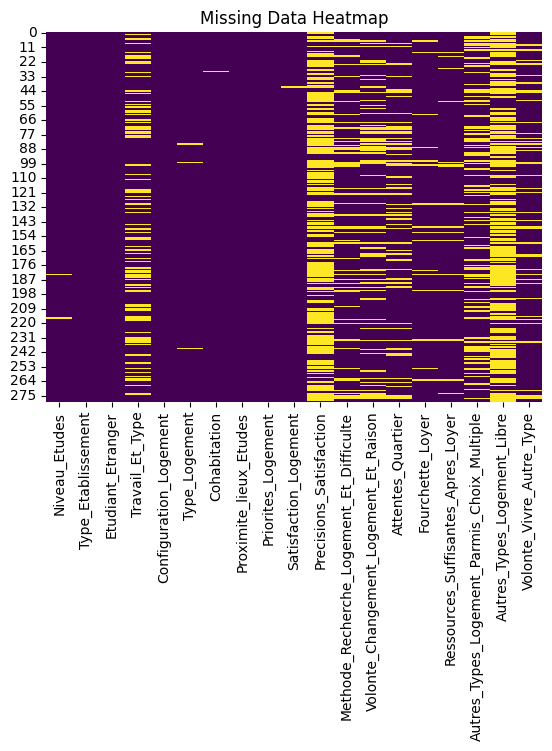

In [71]:
# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt
# Count missing values per column
missing_counts = df.isnull().sum()
print(missing_counts)
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()


When it comes to null values there a clear divide, with free_text columns having conciderably more null entries than categorical ones. This is dues to the fact that many of the survey's participants chose to answer only the quick miltiple choice questions with predefined propositions rather than write their own responses for open ended questions. This however doesnt mean that we can't draw insight from the free_text responses

A notable exception among categorical variables is "Travail_Et_Type" which has a noticeable number of null entries, this is probably due to the fact that those who don't work take the value null for the question (travailles_tu_si_oui_est_ce) meaning that it should be replaced with "Aucun travail" 

In [72]:
df["Travail_Et_Type"].fillna("Aucun travail", inplace=True)

C:\Users\Youcef Islam\AppData\Local\Temp\ipykernel_18024\3350560508.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Travail_Et_Type"].fillna("Aucun travail", inplace=True)


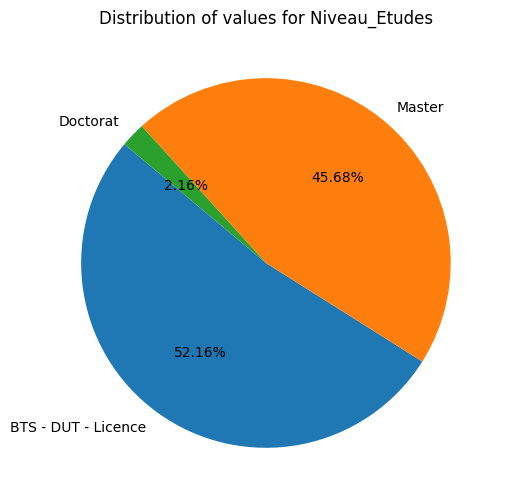

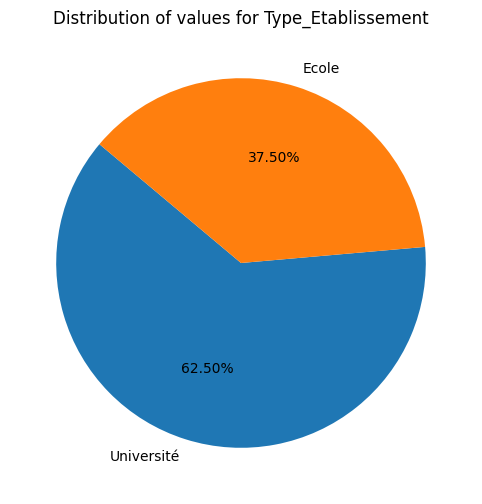

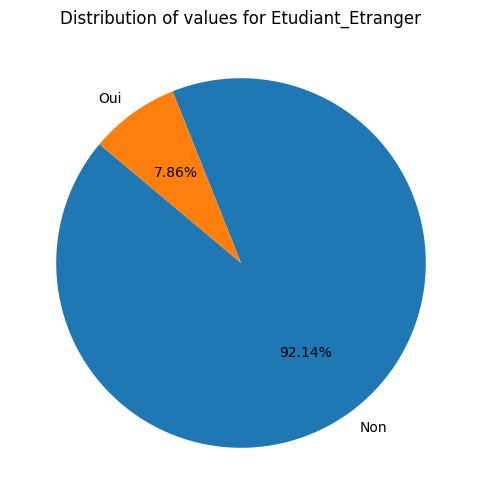

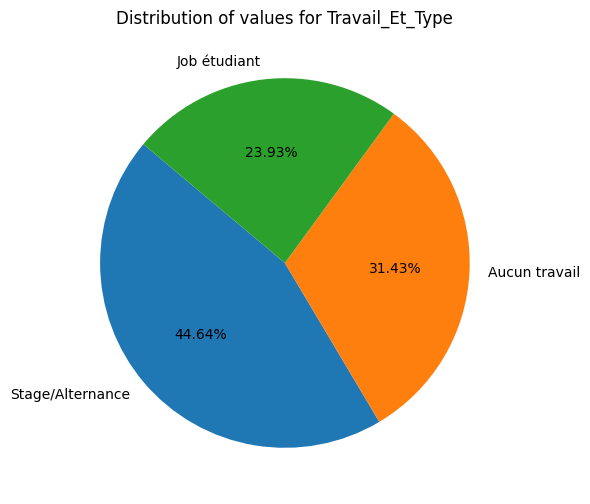

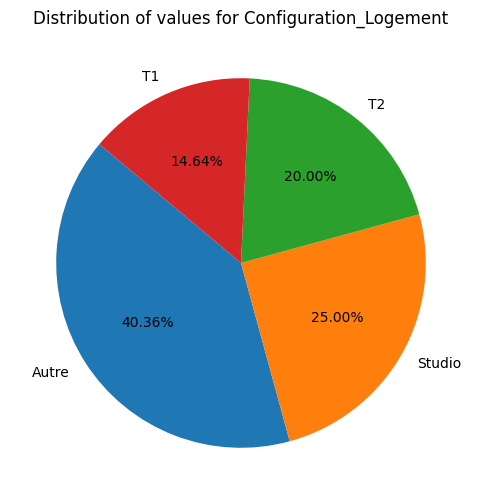

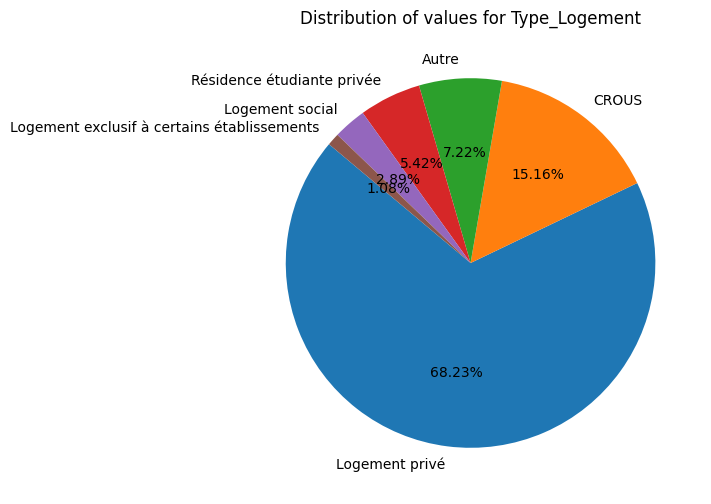

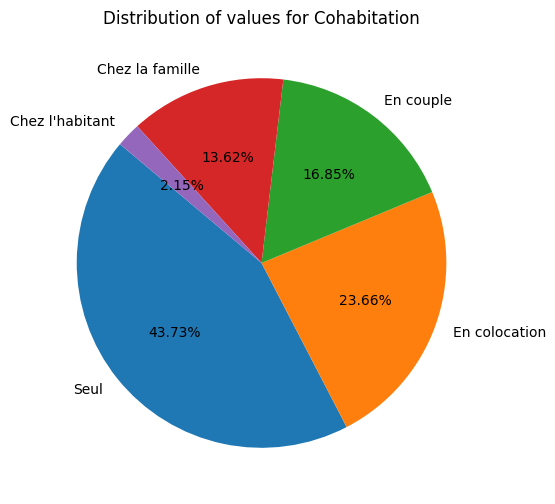

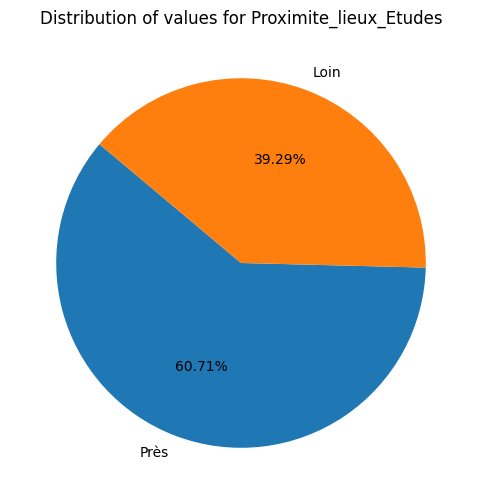

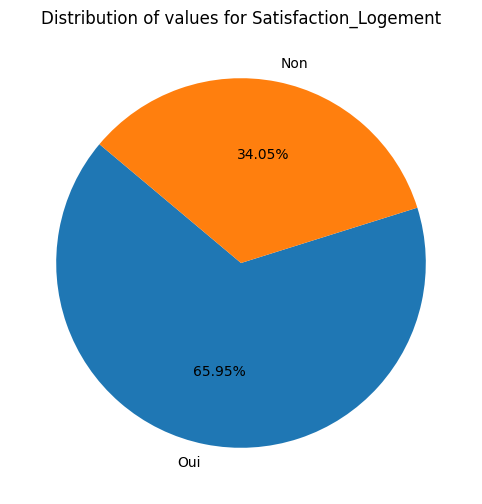

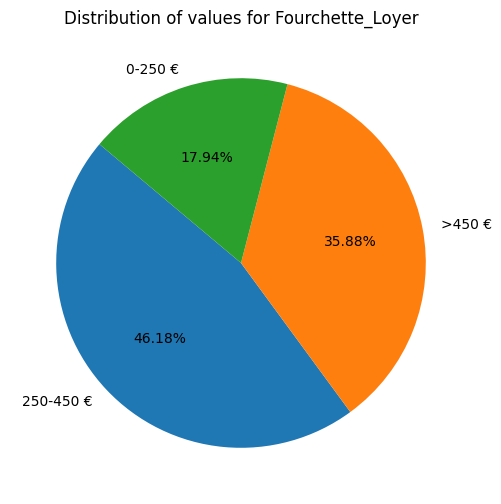

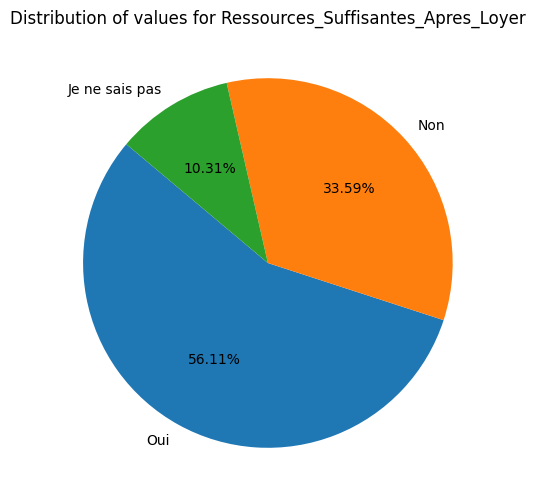

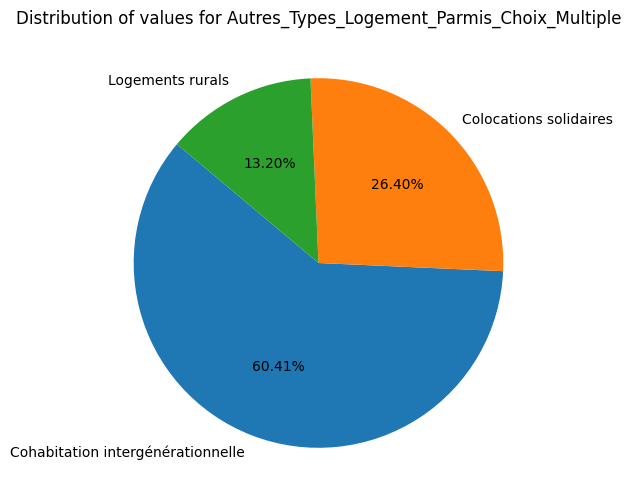

In [73]:
# Categorical Variable Distribution
study_level_distribution = df["Niveau_Etudes"].value_counts()
for col in categoricals:
    plt.figure(figsize=(8, 6))
    plt.pie(
        df[col].value_counts().values, 
        labels=df[col].value_counts().index, 
        autopct='%1.2f%%', 
        startangle=140, 
        colors=plt.cm.tab10.colors
    )
    plt.title("Distribution of values for "+ str(col))
    plt.show()

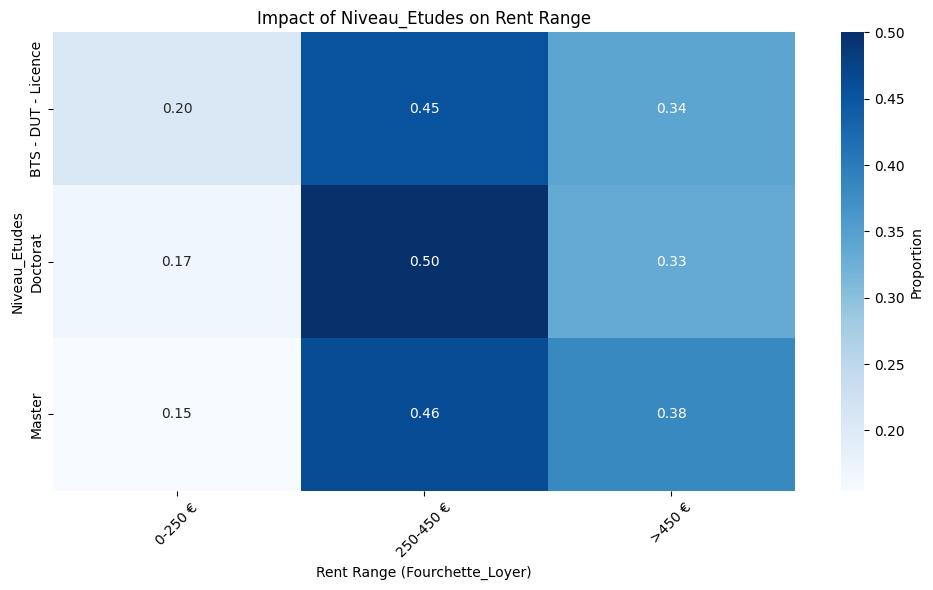

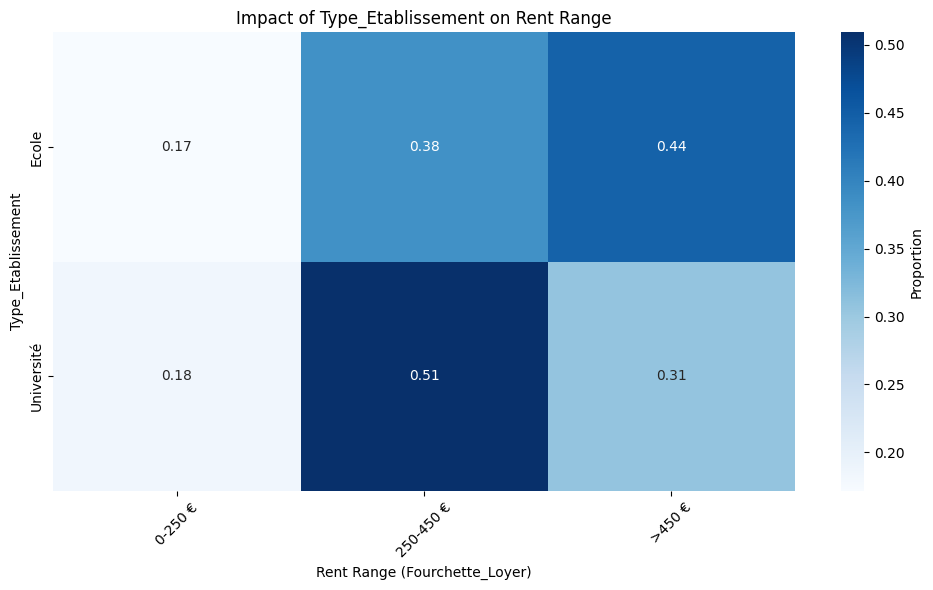

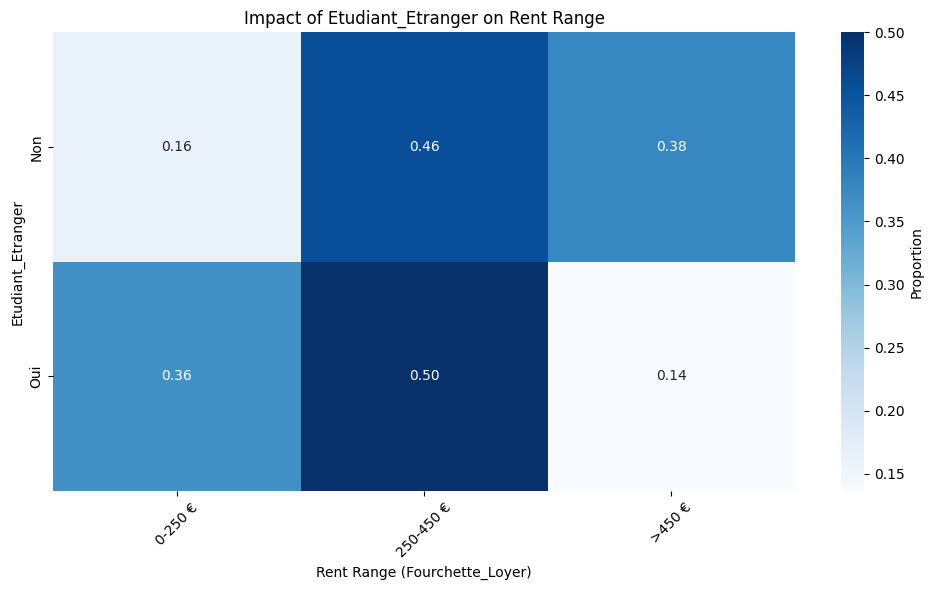

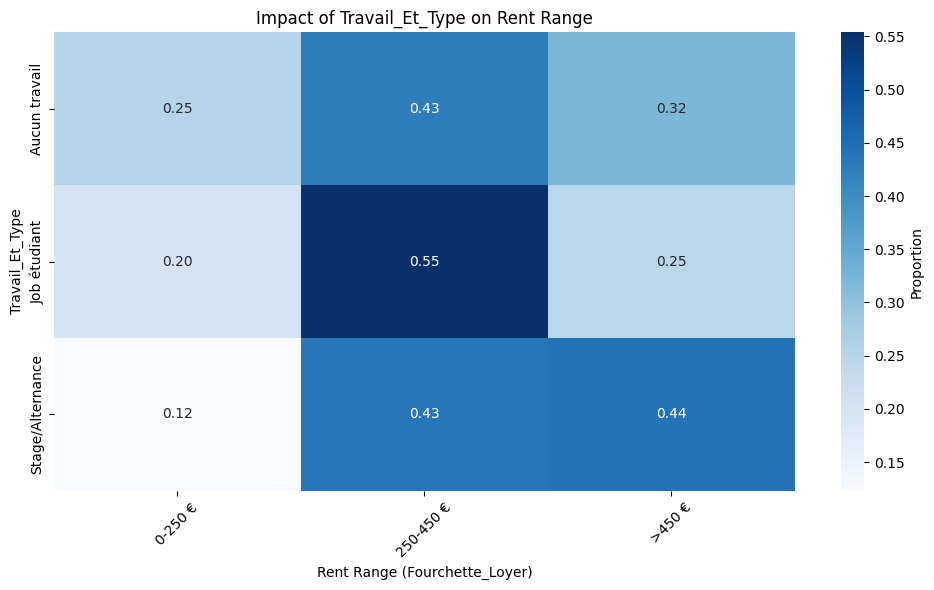

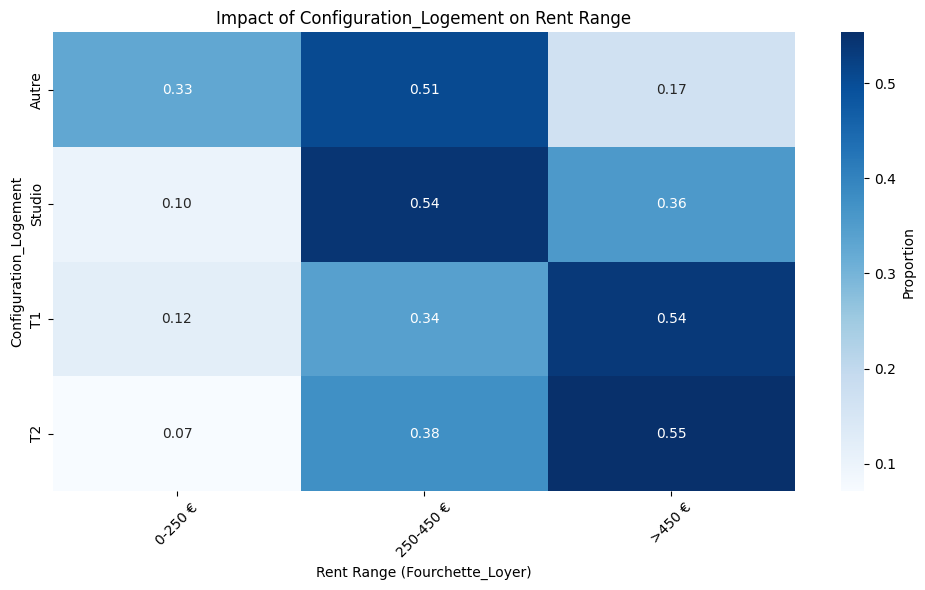

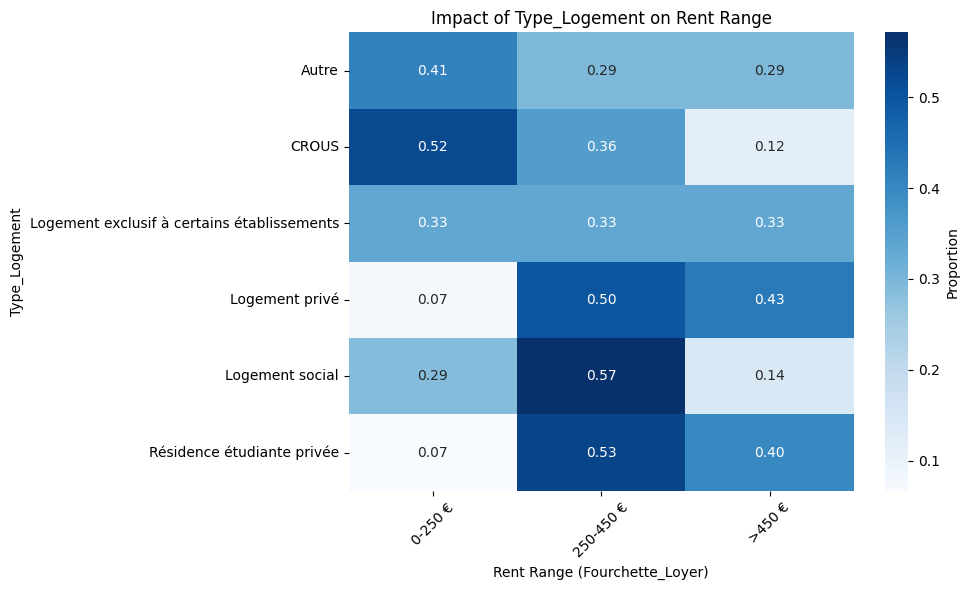

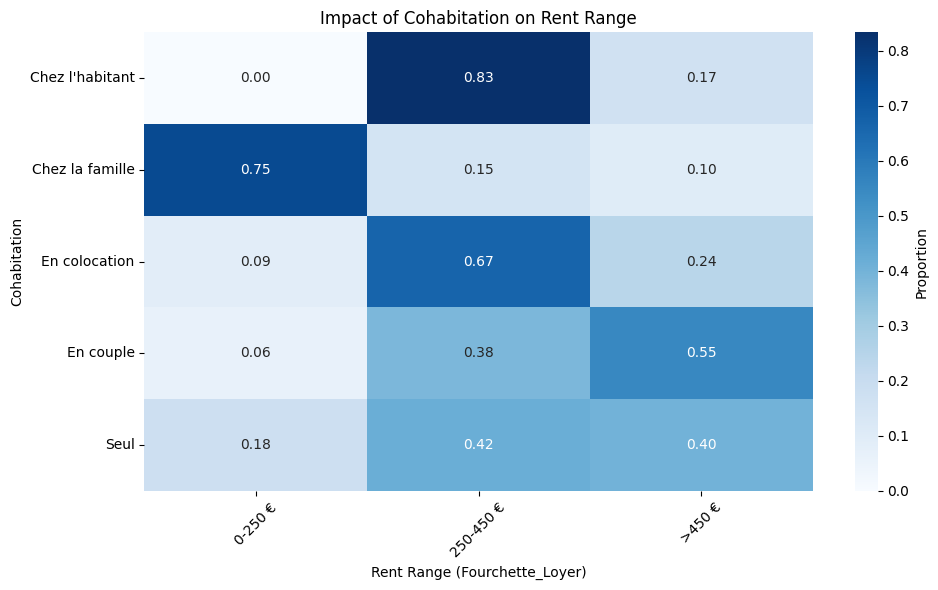

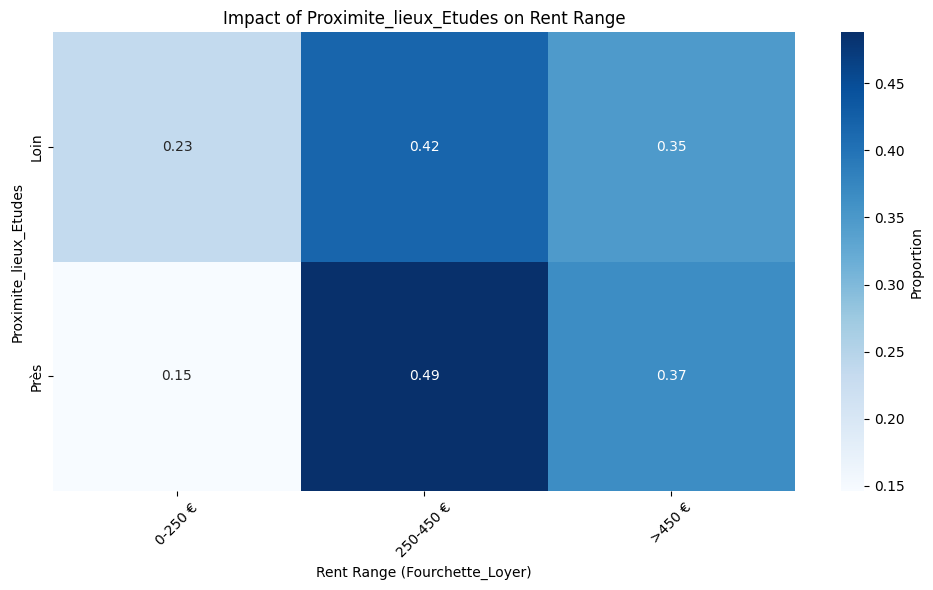

In [74]:
# Cross tabulation: Analyzing the correlations between specific values of pairs of attributes. First the factors that might influence rents
rent_factors = ['Niveau_Etudes', 'Type_Etablissement', 'Etudiant_Etranger', 'Travail_Et_Type', 'Configuration_Logement', 'Type_Logement', 'Cohabitation', 'Proximite_lieux_Etudes']

for factor in rent_factors:
    # Cross tabulation here is normalized by rows in order to be able to compare unique values effectively
    cross_tab = pd.crosstab(df[factor], df['Fourchette_Loyer'], normalize='index')

    # Heatmap for visualization
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        cross_tab,
        annot=True,
        cmap='Blues',
        fmt='.2f',  # Proportion format
        cbar_kws={'label': 'Proportion'}  # Add color bar label
    )
    plt.title(f"Impact of {factor} on Rent Range")
    plt.xlabel("Rent Range (Fourchette_Loyer)")
    plt.ylabel(factor)
    plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
    plt.tight_layout()
    plt.show()


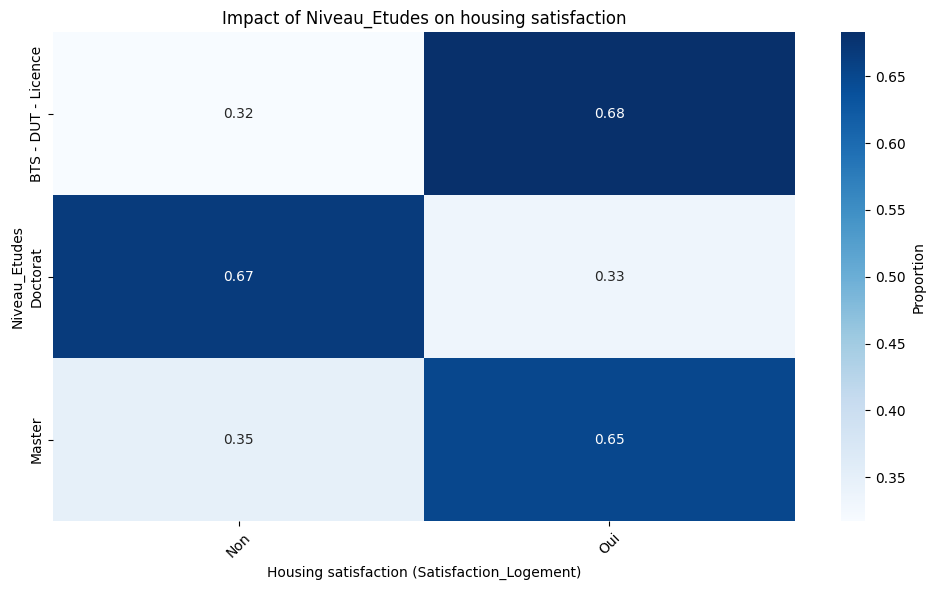

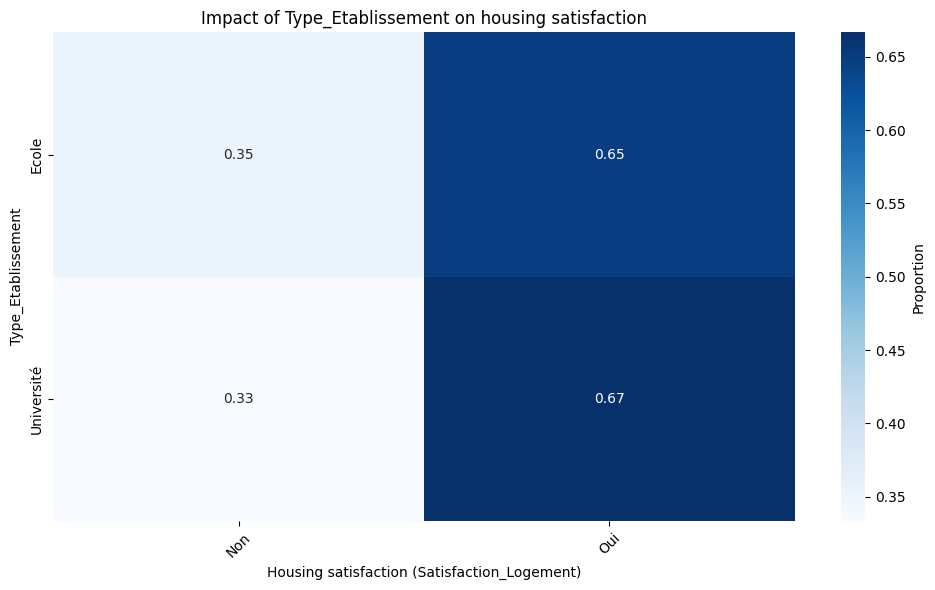

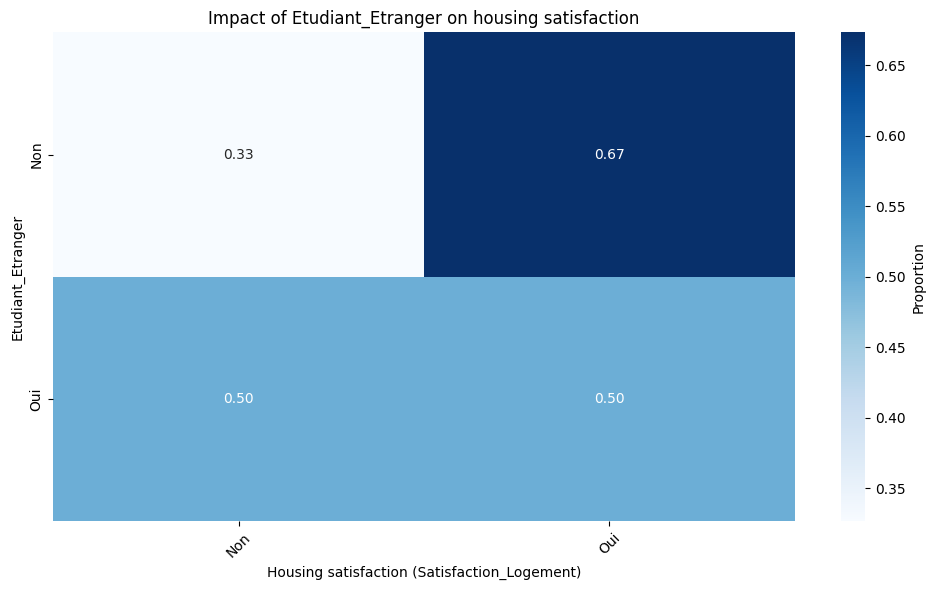

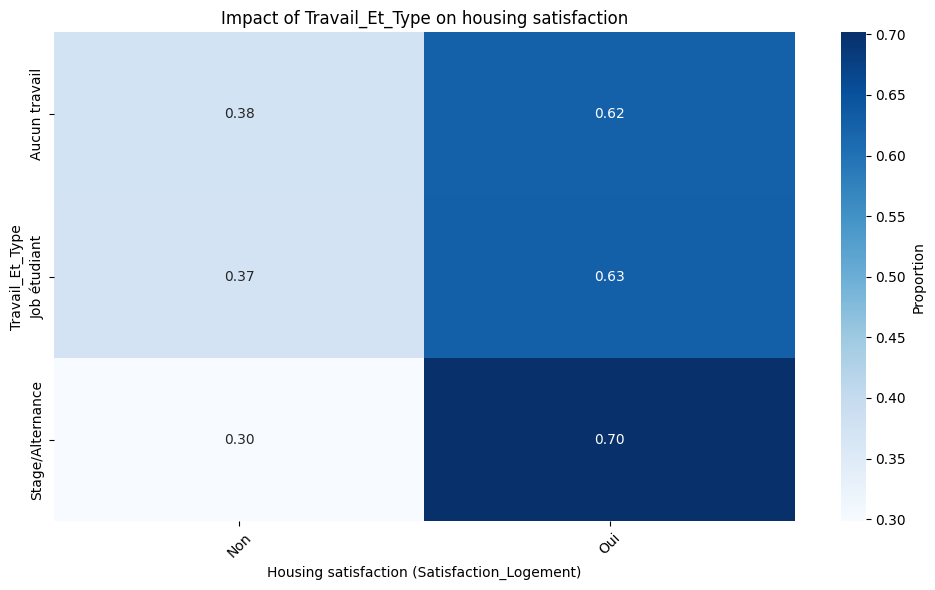

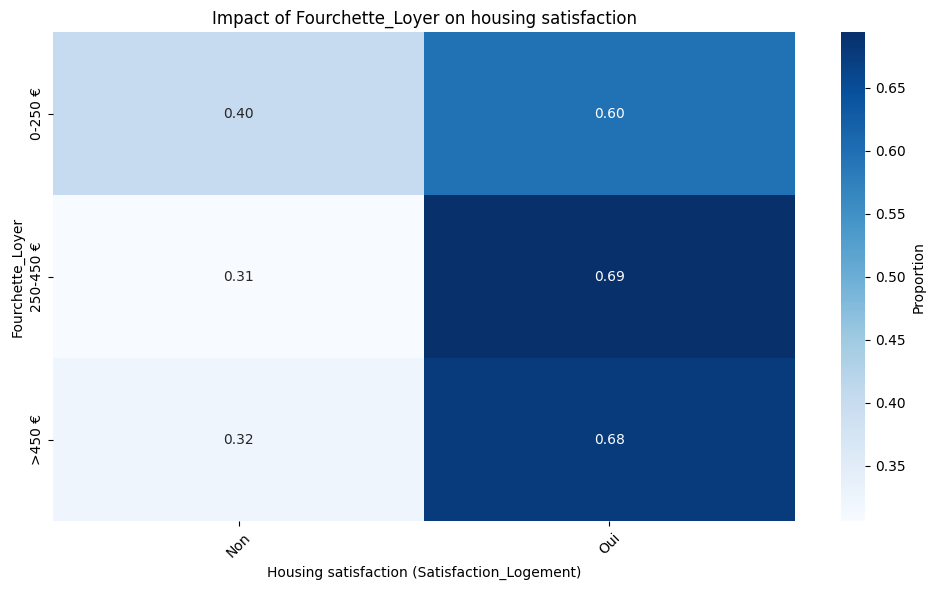

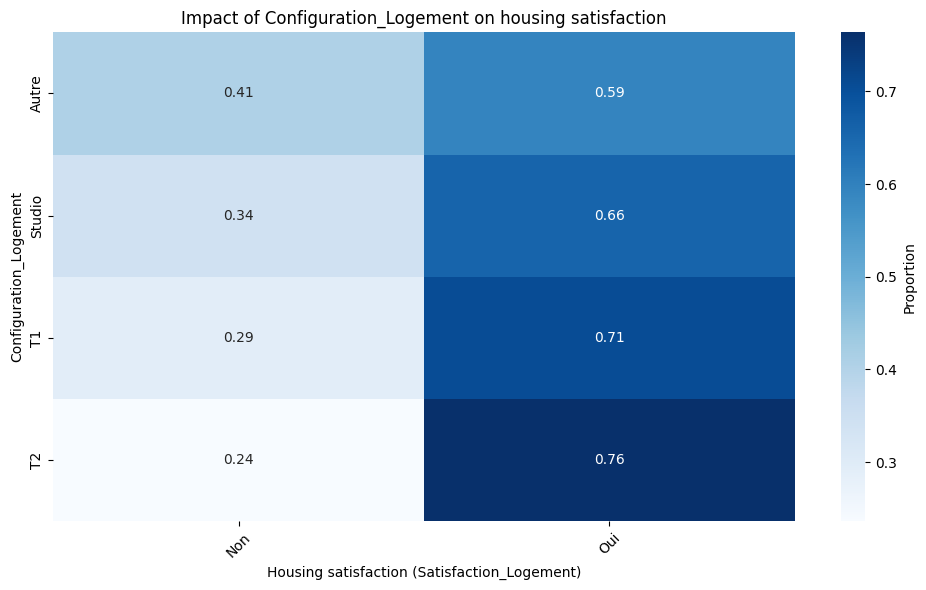

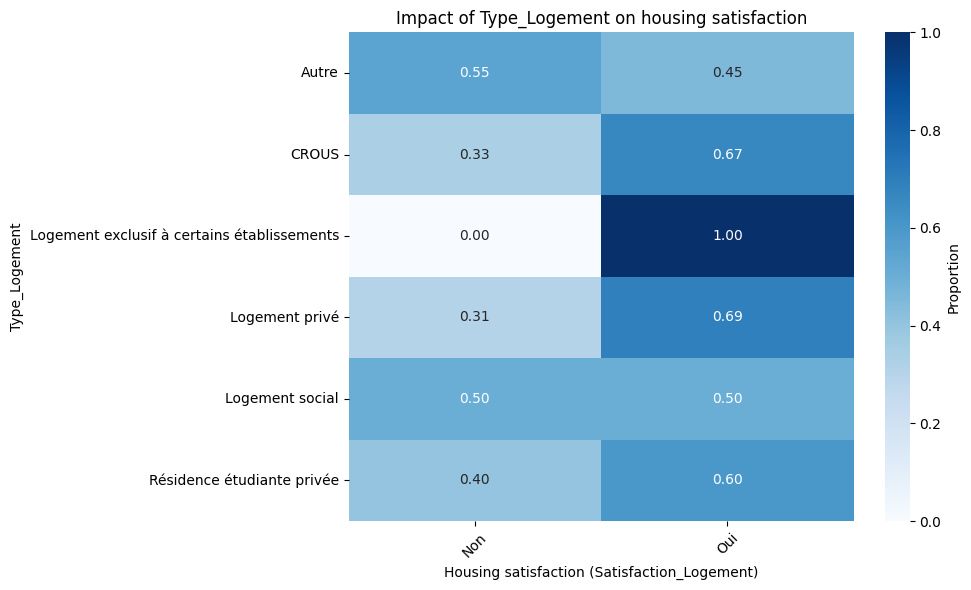

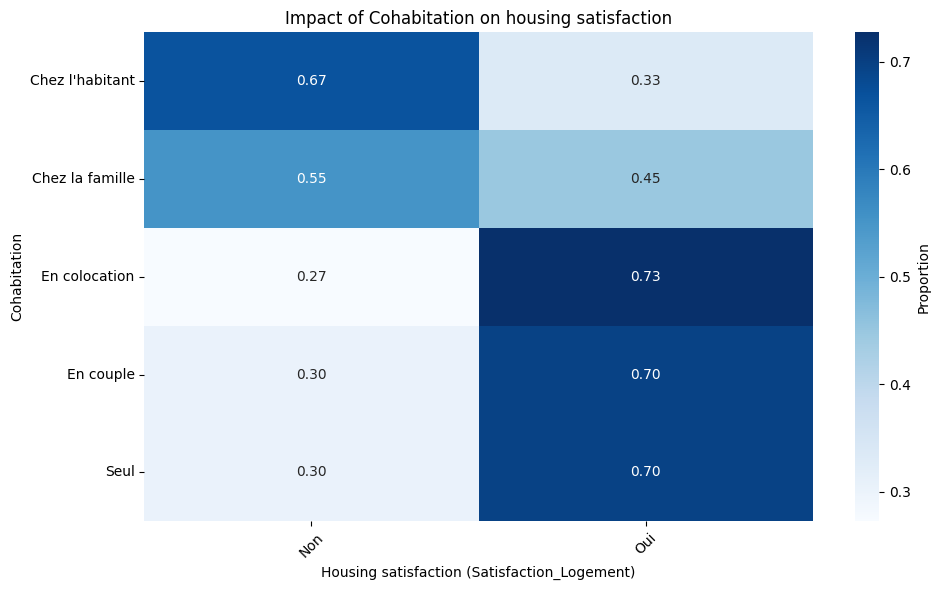

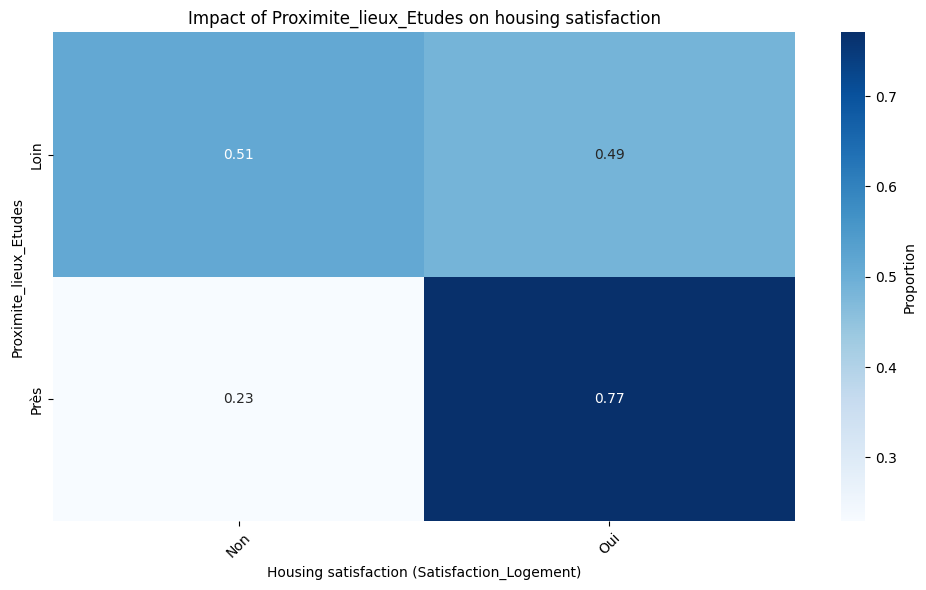

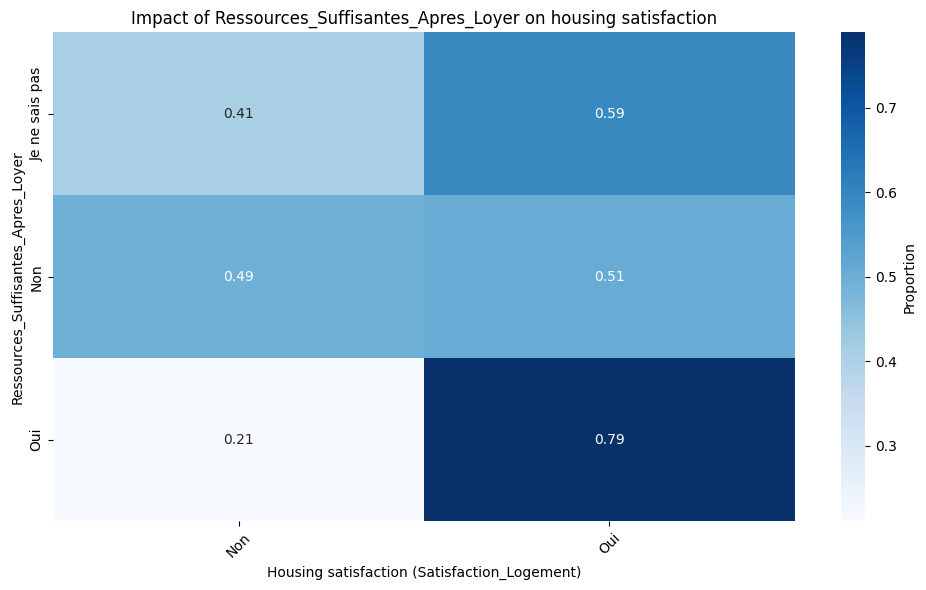

In [75]:
# Factors influencing housing satisfaction
satisfaction_factors = ['Niveau_Etudes', 'Type_Etablissement', 'Etudiant_Etranger', 'Travail_Et_Type', 'Fourchette_Loyer','Configuration_Logement', 'Type_Logement', 'Cohabitation', 'Proximite_lieux_Etudes','Ressources_Suffisantes_Apres_Loyer']
for factor in satisfaction_factors:
    # Cross tabulation here is normalized by rows in order to be able to compare unique values effectively
    cross_tab = pd.crosstab(df[factor], df['Satisfaction_Logement'], normalize='index')

    # Heatmap for visualization
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        cross_tab,
        annot=True,
        cmap='Blues',
        fmt='.2f',  # Proportion format
        cbar_kws={'label': 'Proportion'}  # Add color bar label
    )
    plt.title(f"Impact of {factor} on housing satisfaction")
    plt.xlabel("Housing satisfaction (Satisfaction_Logement)")
    plt.ylabel(factor)
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()

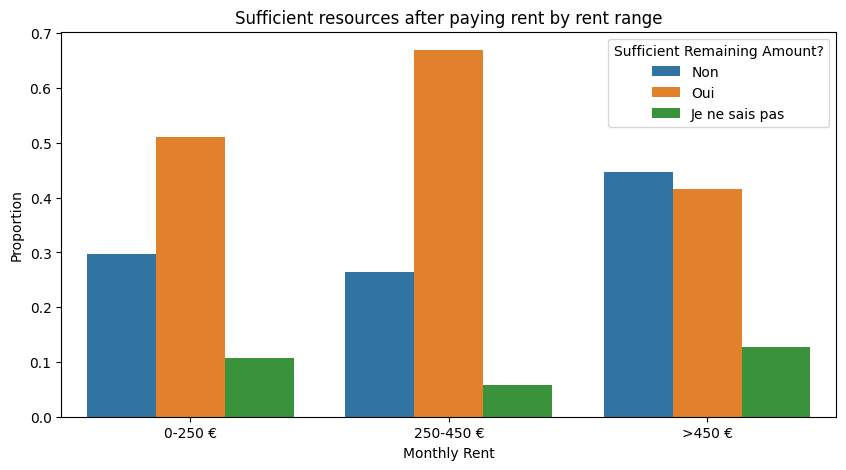

In [76]:
# Calculate proportions for each combination of rent range and response
rent_ranges = ['0-250 €', '250-450 €', '>450 €']
sufficient_ressources_after_rent = df["Ressources_Suffisantes_Apres_Loyer"].dropna().unique().tolist()
rent_ranges_sufficient_ressources = {}
for range in rent_ranges:
    total = len(df[df["Fourchette_Loyer"]==range])
    range_details = {}
    for val in sufficient_ressources_after_rent:
        range_details[val]=len(df[(df["Ressources_Suffisantes_Apres_Loyer"]==val) & (df["Fourchette_Loyer"]==range)])/total
    rent_ranges_sufficient_ressources[range] = range_details

# Convert the proportions dictionary into a long-format DataFrame
rent_ranges_sufficient_ressources_frame = (
    pd.DataFrame(rent_ranges_sufficient_ressources)
    .T.reset_index()
    .melt(id_vars='index', var_name='Enough ressources after paying rent?', value_name='Proportion')
    .rename(columns={'index': 'Rent range'})
)

# Plot using Seaborn barplot since we are dealing with proportions
plt.figure(figsize=(10, 5))
sns.barplot(
    x='Rent range',
    y='Proportion',
    hue='Enough ressources after paying rent?',
    data=rent_ranges_sufficient_ressources_frame
)

# Add labels and title
plt.title("Sufficient resources after paying rent by rent range")
plt.xlabel("Monthly Rent")
plt.ylabel("Proportion")
plt.legend(title="Sufficient Remaining Amount?")
plt.show()




As we expect a higher proportion (about 45%) of those paying higher rents (more than 450€) express that they don't have enough money left after paying rent, however an unsual observation is that a lower proportion of those paying the cheapest rents say that they have enough ressources left after rent compared to those in the middle bracket (51% vs 70%) which means that the rent price alone isn't the souel determinant of weather or not the student has enough ressources (maybe other factors are at play, for example low rent payers are likely to be not working or are likely to be foreign students with tighter budgets)

# 3- Data mining: connecting the dots

The first overview that we took on our data as well as the exploratory allowed us to discover interesting relationships between the factors at play and make plausible hypotheses. In this step we will use data mining methods to confirm our deny our suspicions and even uncover more hidden patterns within our data

# 4- Exploiting free_text responses

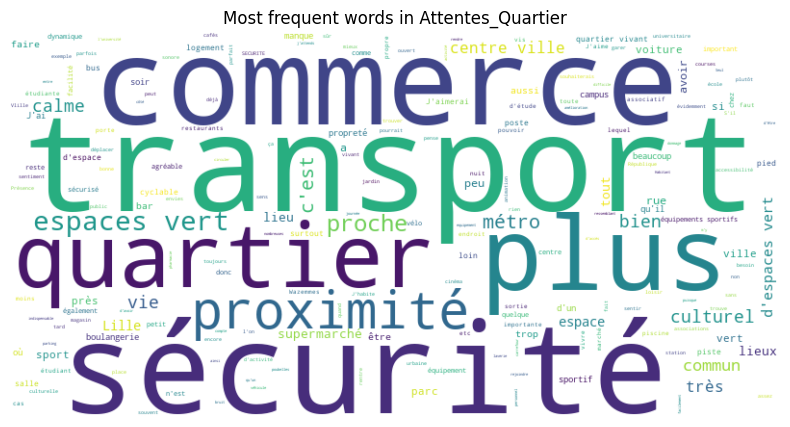

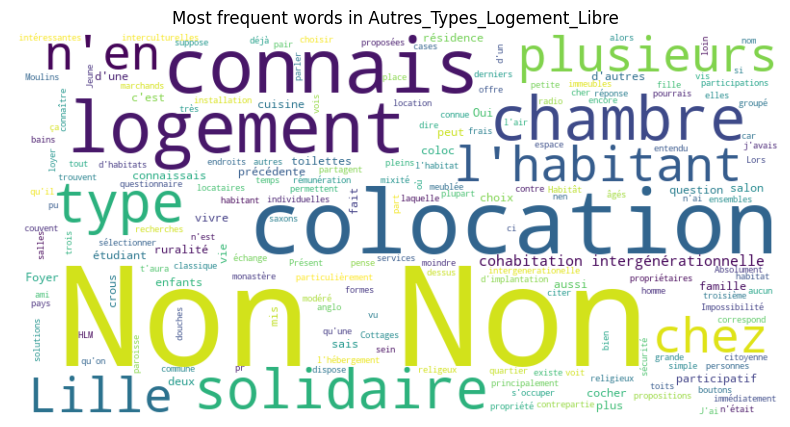

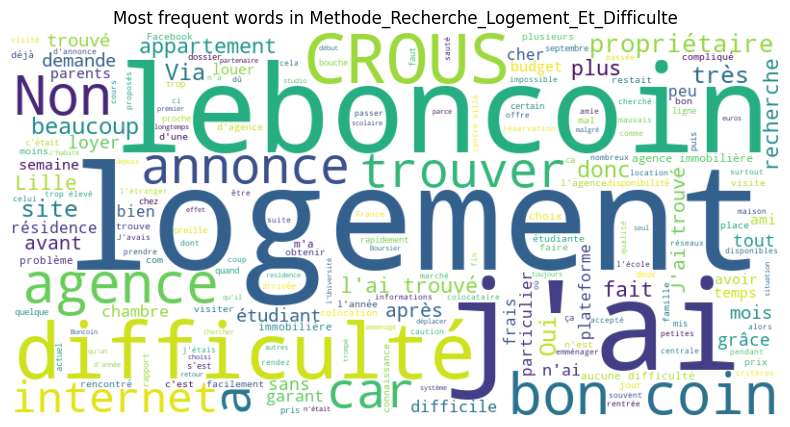

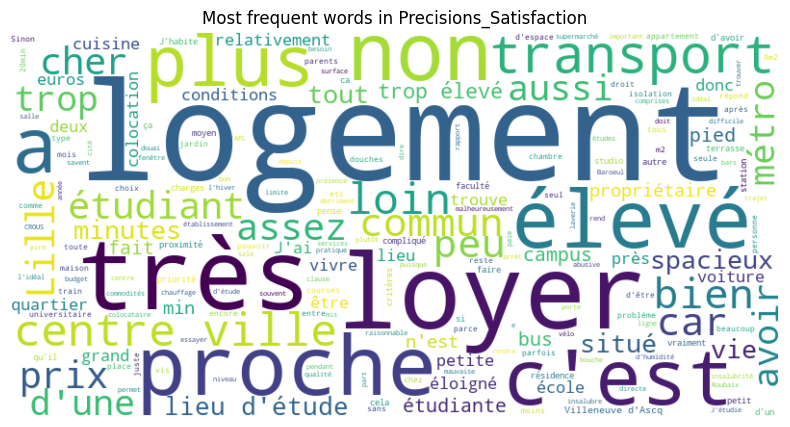

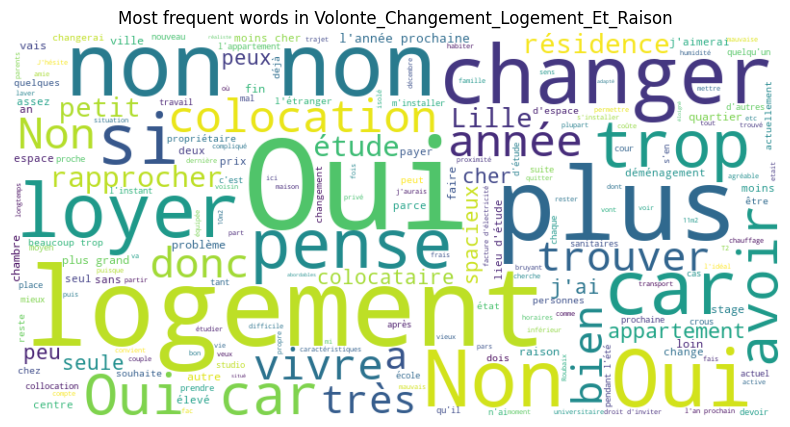

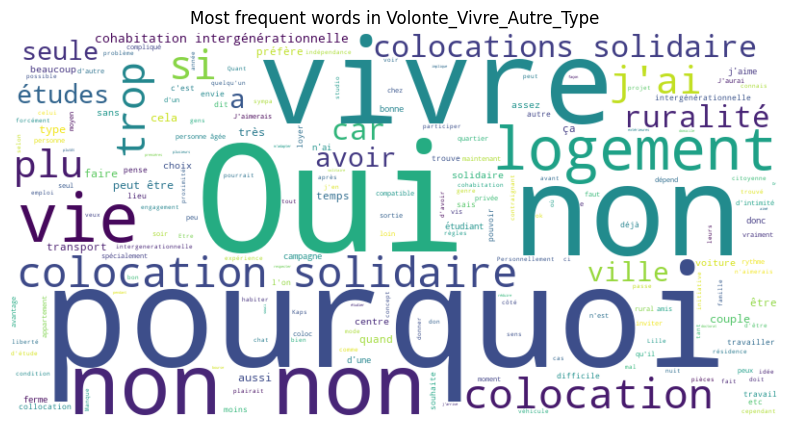

In [78]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Generate word cloud for free-text columns
for col in free_texts[0:6]:
    text_data = ' '.join(df[col].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords.words("french")).generate(text_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most frequent words in '+str(col))
    plt.show()